In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
df = pd.read_csv('../data/_data.csv')
pd.set_option('display.max_columns', None)
df.head(4)

,Unnamed: 0,ID объявления,Количество комнат,Тип,Метро,Адрес,"Площадь, м2",Дом,Парковка,Цена,Телефоны,Описание,Ремонт,"Площадь комнат, м2",Балкон,Окна,Санузел,Можно с детьми/животными,Дополнительно,Название ЖК,Серия дома,"Высота потолков, м",Лифт,Мусоропровод,Ссылка на объявление
0,0,271271157,4,Квартира,м. Смоленская (9 мин пешком),"Москва, улица Новый Арбат, 27",200.0/20.0,"5/16, Монолитный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79166369231,Без комиссии для нанимателя! Бонус коллегам 12...,Дизайнерский,NaN,NaN,NaN,NaN,"Можно с детьми, Можно с животными","Мебель в комнатах, Мебель на кухне, Ванна, Душ...","Новый Арбат, 2010",NaN,3.0,"Пасс (4), Груз (1)",Да,https://www.cian.ru/rent/flat/271271157
1,1,271634126,4,Квартира,м. Смоленская (8 мин пешком),"Москва, улица Новый Арбат, 27",198.0/95.0/18.0,"5/16, Монолитно-кирпичный",подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...",+79850608590,Лот 93107. Елена Анисимова.\n\nБонус агенту 50...,Дизайнерский,25 25 20 25,NaN,На улицу и двор,"Совмещенный (2), Раздельный (1)",Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.5,"Пасс (1), Груз (1)",Нет,https://www.cian.ru/rent/flat/271634126
2,2,271173086,"4, Оба варианта",Квартира,м. Смоленская (7 мин пешком),"Москва, улица Новый Арбат, 27",200.0/116.0/4.0,5/16,подземная,"500000.0 руб./ За месяц, Залог - 500000 руб., ...","+79672086536, +79099269384","ID 36380: Шикарная 4-х км. квартира в ЖК ""Нов...",Евроремонт,NaN,NaN,На улицу и двор,Совмещенный (3),Можно с детьми,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",Новый Арбат,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/271173086
3,3,272197456,"4, Оба варианта",Квартира,м. Смоленская (3 мин пешком),"Москва, переулок Плотников, 21С1",170.0/95.0/17.0,5/6,подземная,"400000.0 руб./ За месяц, Залог - 400000 руб., ...","+79660342340, +79099269384",ID 31618: Эксклюзивное предложение. Современн...,Евроремонт,14-42-20-19,NaN,На улицу и двор,Совмещенный (3),Можно с животными,"Мебель в комнатах, Мебель на кухне, Ванна, Душ...",NaN,NaN,3.2,Пасс (1),NaN,https://www.cian.ru/rent/flat/272197456


1. Преобразуем датафрейм для дальнейшего построения графиков на основании данных и их анализа

In [3]:
# выносим цену без залога в отдельный столбец
# создаем копию df
df_new = df.copy()
def extract_price_and_deposit(price_str):
    if pd.isna(price_str):
        return pd.Series([None, None])
    
    # ищем цену (там где рубли)
    price_match = re.search(r'(\d[\d\s]*\.?\d*)\s*руб', price_str)
    # ищем залог (залог - число)
    deposit_match = re.search(r'Залог\s*-\s*(\d[\d\s]*\.?\d*)\s*руб', price_str)
    
    price = None
    deposit = None
    
    if price_match:
        price_str_clean = price_match.group(1).replace(' ', '')
        try:
            price = float(price_str_clean)
        except:
            price = None
    
    if deposit_match:
        deposit_str_clean = deposit_match.group(1).replace(' ', '')
        try:
            deposit = float(deposit_str_clean)
        except:
            deposit = None
    
    return pd.Series([price, deposit])

df_new[['Цена без залога, руб./мес', 'Залог, руб.']] = df_new['Цена'].apply(extract_price_and_deposit)

pd.set_option('display.max_columns', None)

# переставляем эти столбцы
# cols = list(df_new.columns)
# pos = cols.index('Цена')
# удаляем новые столбцы из конца
# cols.remove('Цена без залога, руб./мес')
# cols.remove('Залог, руб.')
# вставляем новые столбцы после 'Площадь, м2'
# cols.insert(pos + 1, 'Цена без залога, руб./мес')
# cols.insert(pos + 2, 'Залог, руб.')
# переставляем столбцы в датафрейме
# df_new = df_new[cols]

In [4]:
# создаем два столбца общая площадь и жилая площадь
def extract_areas(area_str):
    try:
        parts = area_str.split('/')
        total_area = float(parts[0]) if len(parts) > 0 else None
        living_area = float(parts[1]) if len(parts) > 1 else None
        return pd.Series([total_area, living_area])
    except:
        return pd.Series([None, None])

df_new[['Общая площадь, м2', 'Жилая площадь, м2']] = df_new['Площадь, м2'].apply(extract_areas)

In [5]:
# переставляем столбцы
# список всех столбцов
# cols = list(df_new.columns)
# pos = cols.index('Площадь, м2')\
# удаляем новые столбцы из конца
# cols.remove('Общая площадь, м2')
# cols.remove('Жилая площадь, м2')
# вставляем новые столбцы после 'Площадь, м2'
# cols.insert(pos + 1, 'Общая площадь, м2')
# cols.insert(pos + 2, 'Жилая площадь, м2')
# переставляем столбцы в датафрейме
# df_new = df_new[cols]

2. Строим графики для обзора ключевых признаков

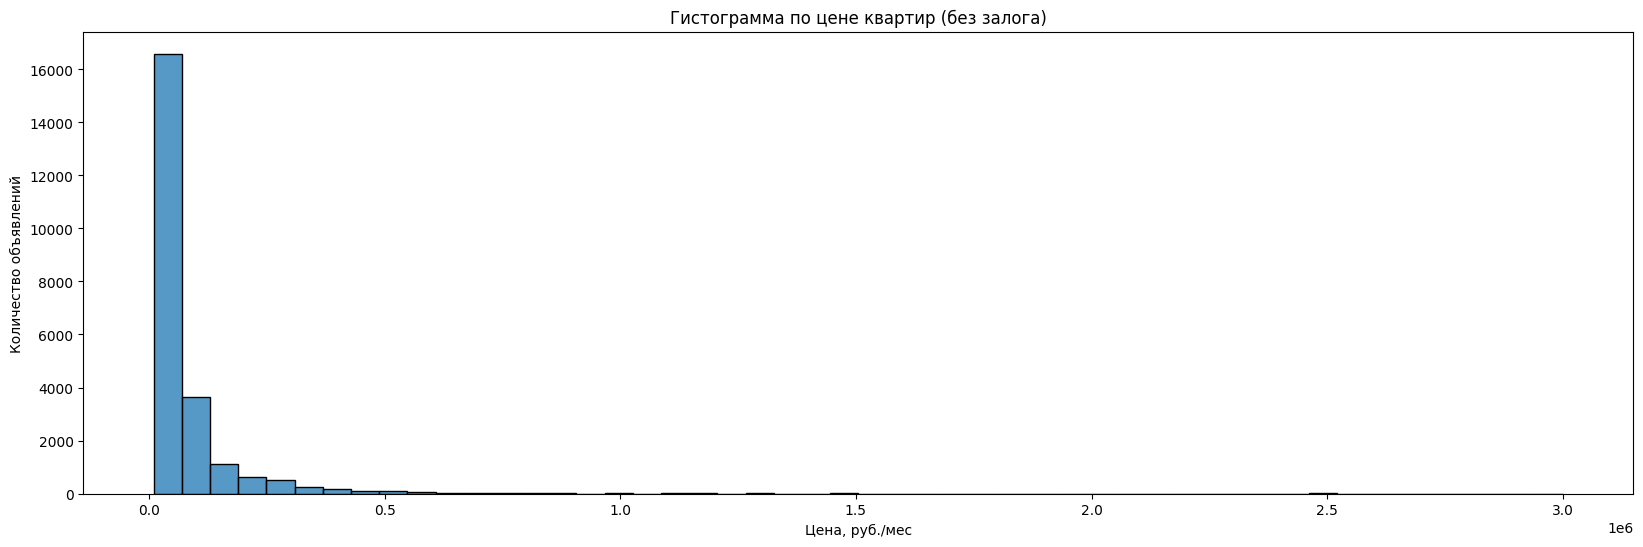

In [6]:
# гистограмма по цене квартир
plt.figure(figsize=(20,6))
sns.histplot(df_new['Цена без залога, руб./мес'], bins=50)
plt.title('Гистограмма по цене квартир (без залога)')
plt.xlabel('Цена, руб./мес')
plt.ylabel('Количество объявлений')
plt.show()

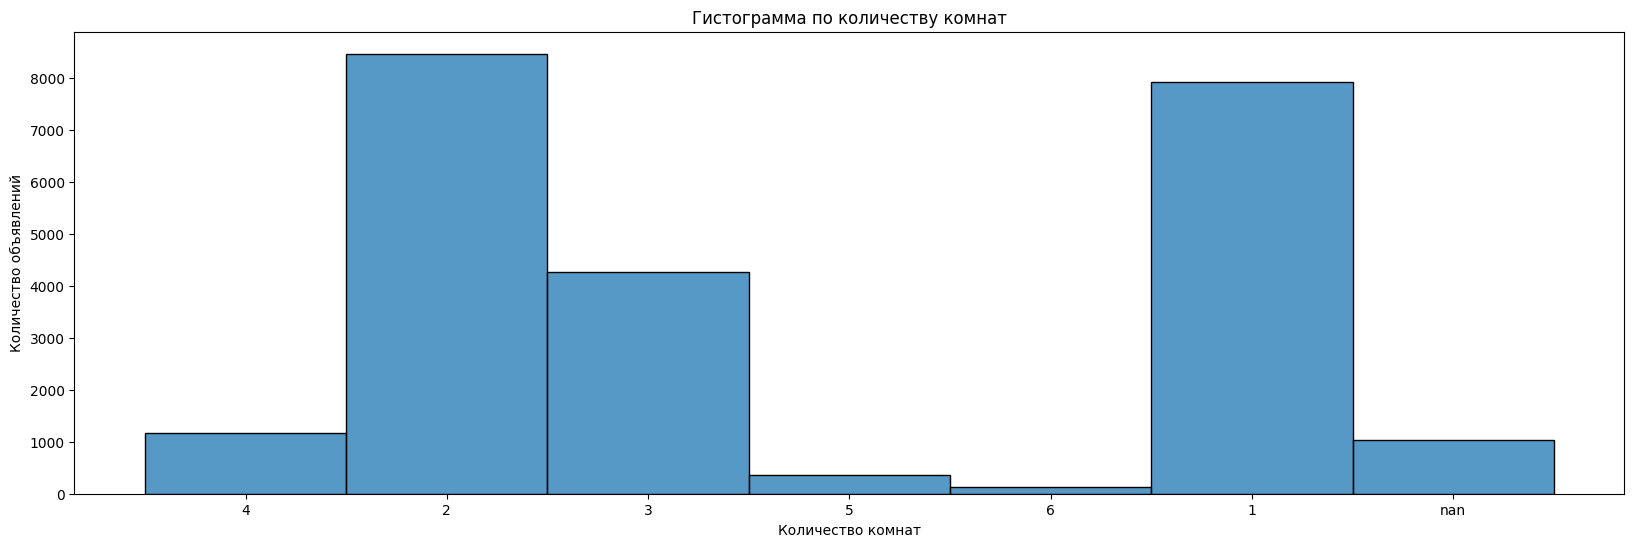

In [7]:
# оставим в столбце "Количество комнат" только число комнат
df_new['Количество комнат'] = df_new['Количество комнат'].astype(str).apply(lambda x: x.split(',')[0].strip())
# строим гистограмму по количеству комнат
plt.figure(figsize=(20,6))
sns.histplot(df_new['Количество комнат'])
plt.title('Гистограмма по количеству комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объявлений')
plt.show()

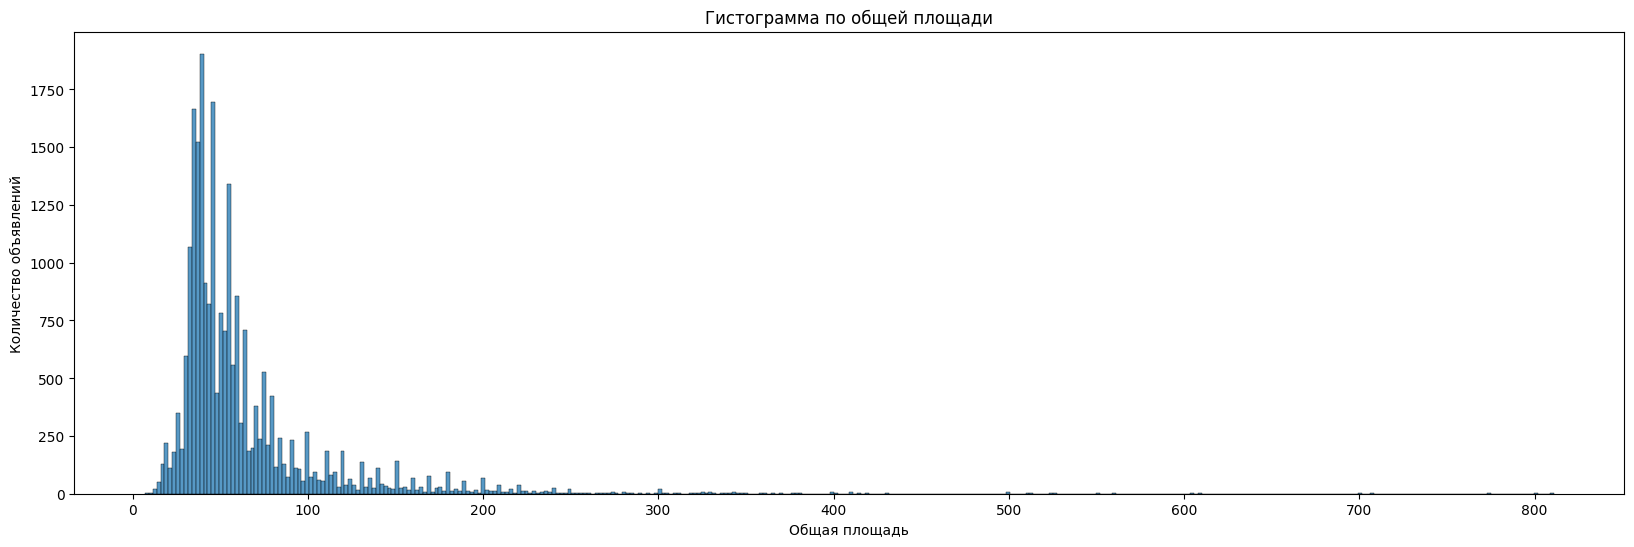

In [8]:
# гистограмма по общей площади квартир
plt.figure(figsize=(20,6))
sns.histplot(df_new['Общая площадь, м2'])
plt.title('Гистограмма по общей площади')
plt.xlabel('Общая площадь')
plt.ylabel('Количество объявлений')
plt.show()

2. Строим графики для отслеживания связи между признаками

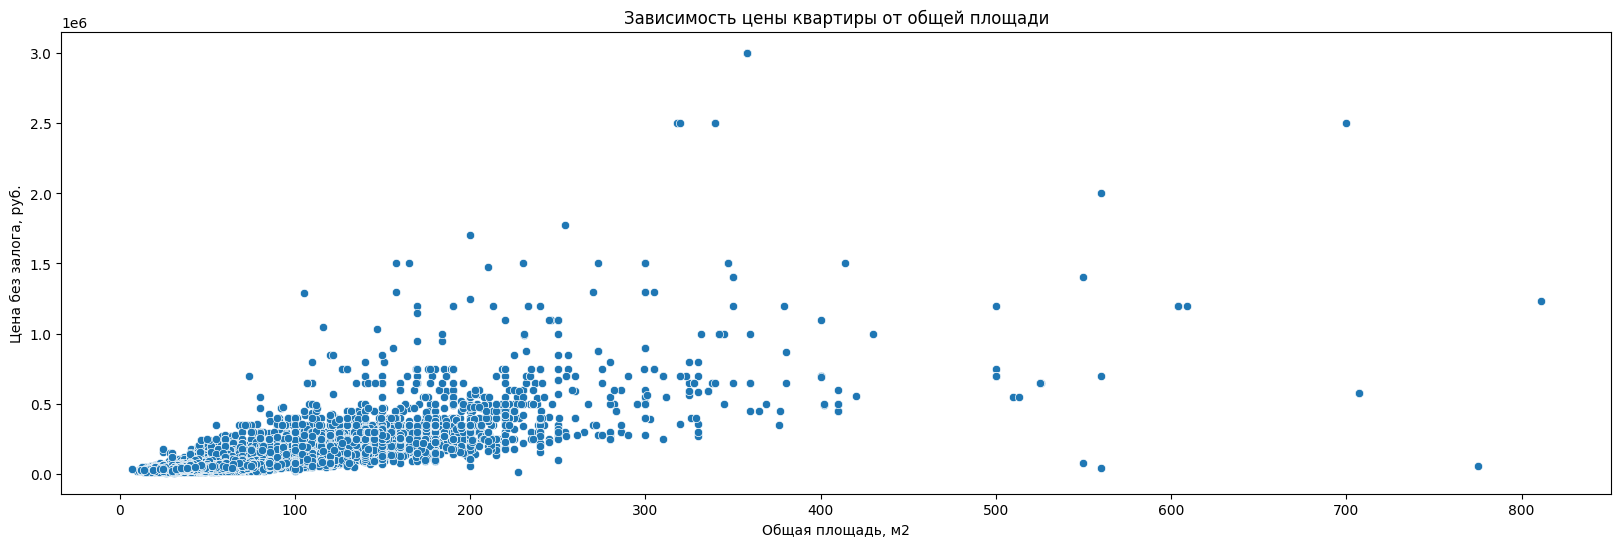

In [9]:
# scatterplot по цене и площади квартир
plt.figure(figsize=(20,6))
sns.scatterplot(data=df_new, x='Общая площадь, м2', y='Цена без залога, руб./мес')
plt.title('Зависимость цены квартиры от общей площади')
plt.xlabel('Общая площадь, м2')
plt.ylabel('Цена без залога, руб.')
plt.show()

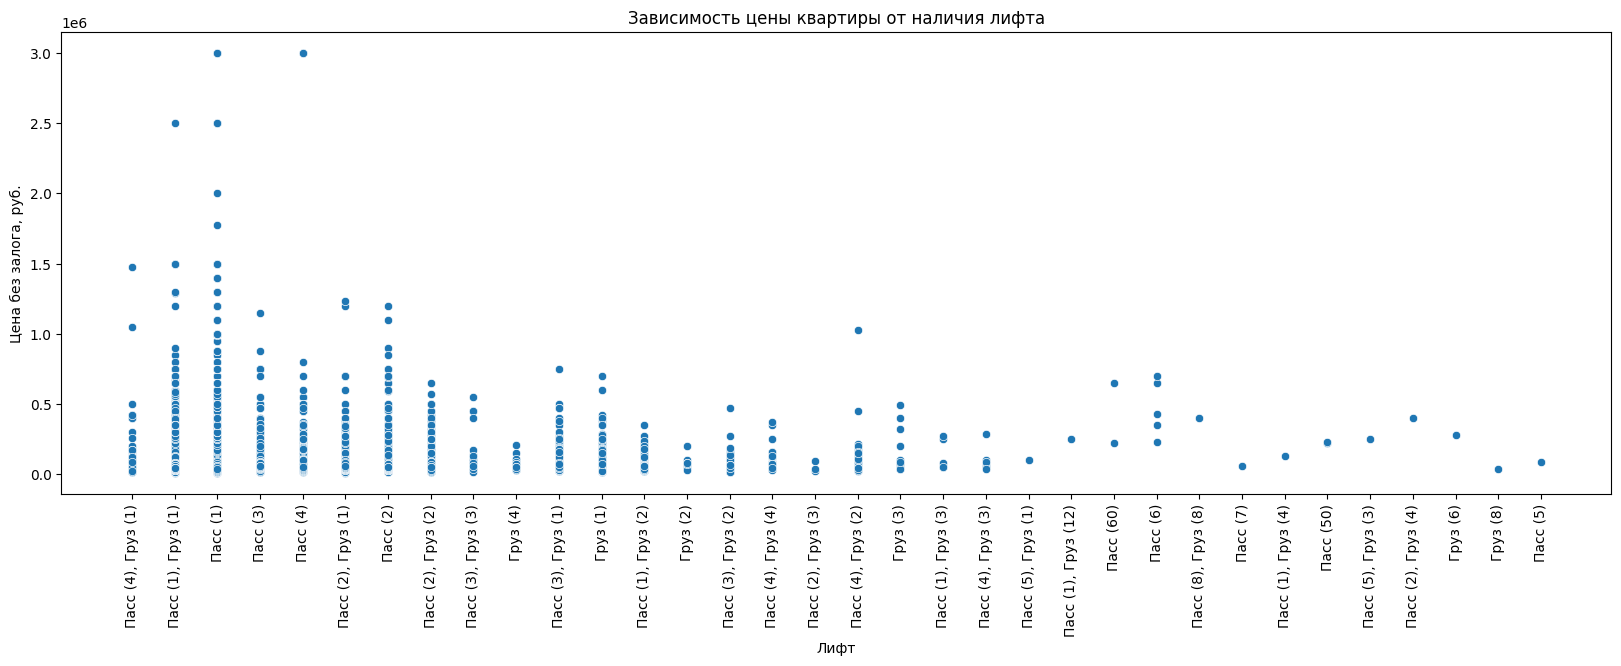

In [10]:
# scatterplot по цене и наличию лифта
plt.figure(figsize=(20,6))
sns.scatterplot(data=df_new, x='Лифт', y='Цена без залога, руб./мес')
plt.title('Зависимость цены квартиры от наличия лифта')
plt.xlabel('Лифт')
plt.ylabel('Цена без залога, руб.')
plt.xticks(rotation=90)
plt.show()

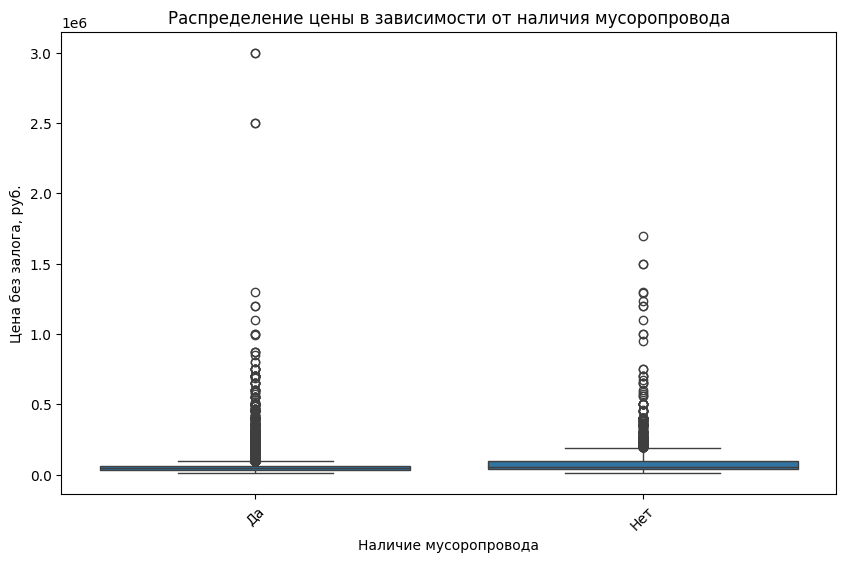

In [11]:
# boxplot по цене и наличию мусоропровода
plt.figure(figsize=(10,6))
sns.boxplot(data=df_new, x='Мусоропровод', y='Цена без залога, руб./мес')
plt.title('Распределение цены в зависимости от наличия мусоропровода')
plt.xlabel('Наличие мусоропровода')
plt.ylabel('Цена без залога, руб.')
plt.xticks(rotation=45)
plt.show()


In [12]:
# добавим столбец метро без времени до него
df_new['Станция Метро'] = df_new['Метро'].str.split('(').str[0].str.strip()
# группируем по станции метро и считаем среднюю цену
df_new_cleaned = df_new.groupby('Станция Метро')['Цена без залога, руб./мес'].mean()

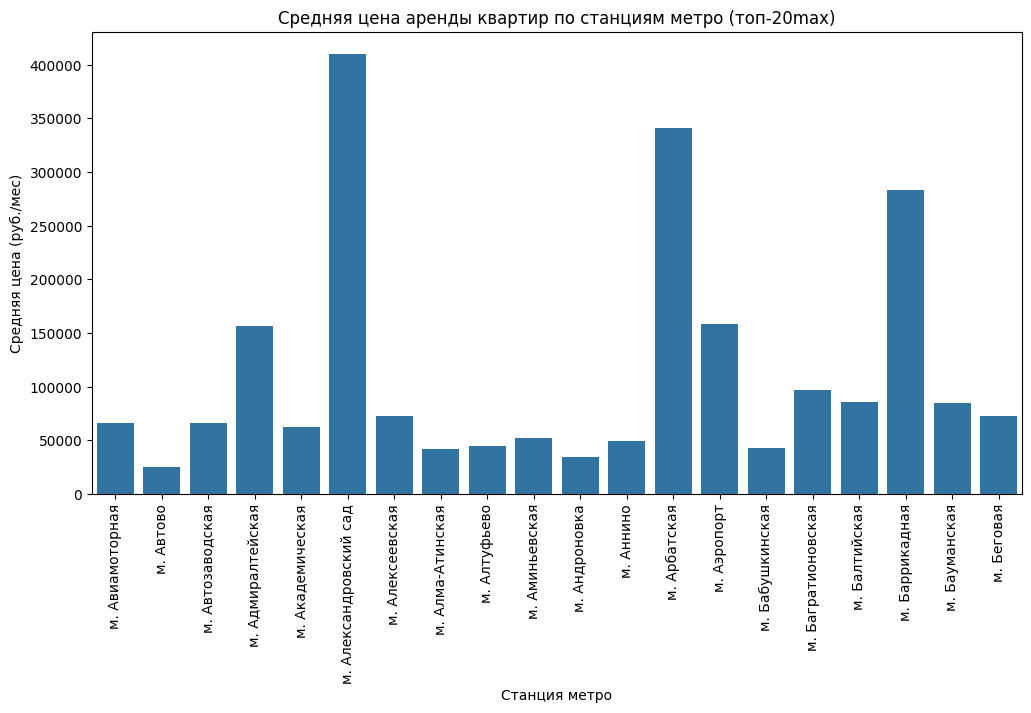

In [13]:
# возьмем топ-20 станций с самой высокой средней ценой
top20max = df_new_cleaned.head(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top20max.index, y=top20max.values)
plt.xticks(rotation=90)
plt.title('Средняя цена аренды квартир по станциям метро (топ-20max)')
plt.ylabel('Средняя цена (руб./мес)')
plt.xlabel('Станция метро')
plt.show()

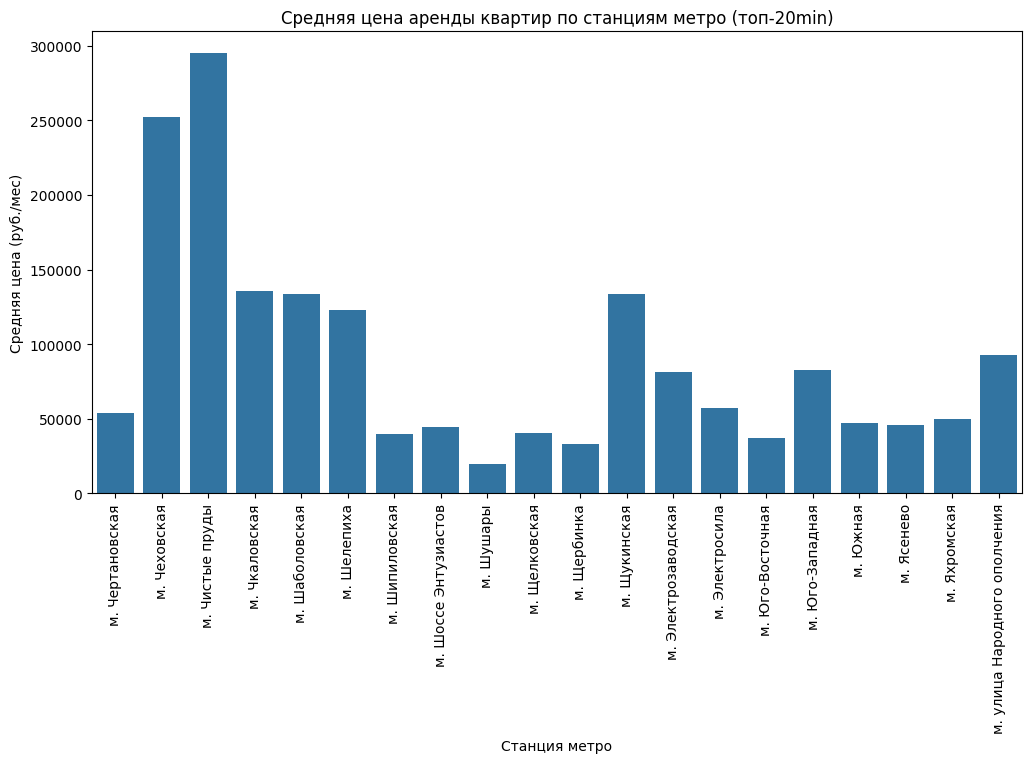

In [14]:
# возьмем топ-20 станций с самой низкой средней ценой
top20min = df_new_cleaned.tail(20)
plt.figure(figsize=(12,6))
sns.barplot(x=top20min.index, y=top20min.values)
plt.xticks(rotation=90)
plt.title('Средняя цена аренды квартир по станциям метро (топ-20min)')
plt.ylabel('Средняя цена (руб./мес)')
plt.xlabel('Станция метро')
plt.show()

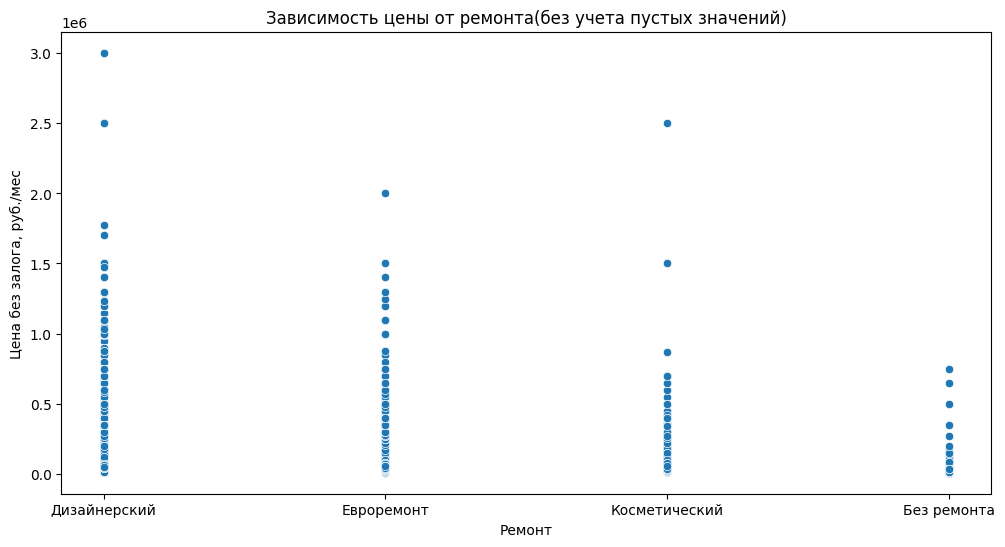

In [15]:
# строим scatterplot зависимости цены от ремонта 
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_new, x = 'Ремонт', y = 'Цена без залога, руб./мес')
plt.title('Зависимость цены от ремонта(без учета пустых значений)')
plt.show()

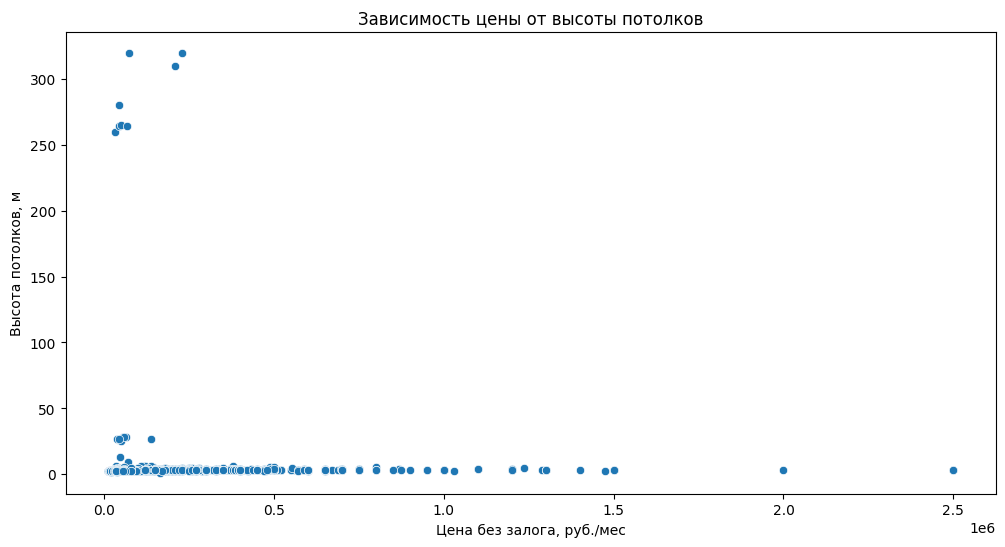

In [16]:
# строим scatterplot зависимости цены от высоты потолков
plt.figure(figsize=(12,6))
sns.scatterplot(data = df_new, x = 'Цена без залога, руб./мес', y = 'Высота потолков, м')
plt.title('Зависимость цены от высоты потолков')
plt.show()

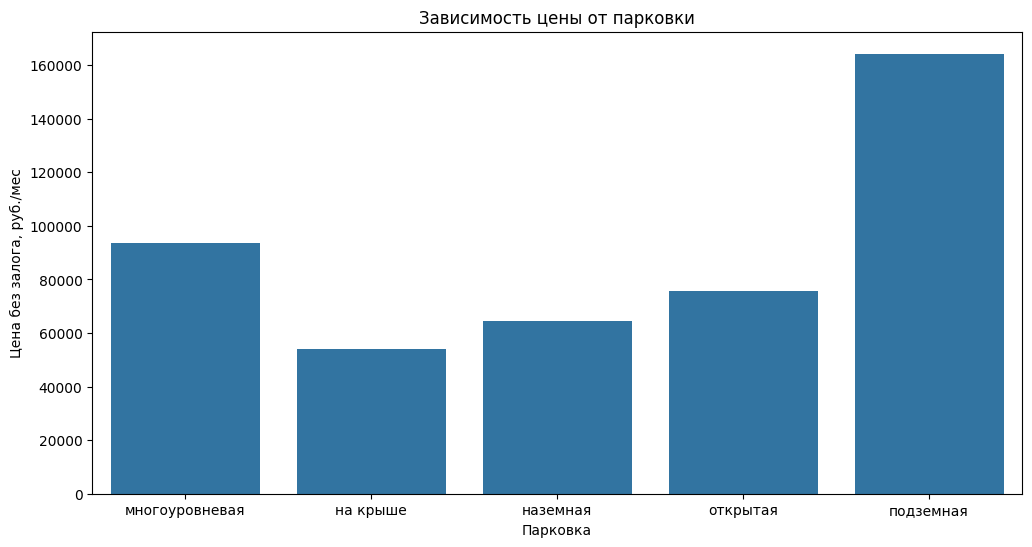

In [17]:
df_new_cleaned_parcking = df_new.dropna(subset=['Парковка'])
df_new_cleaned_parcking = df_new_cleaned_parcking.groupby('Парковка')['Цена без залога, руб./мес'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=df_new_cleaned_parcking, x = 'Парковка', y = 'Цена без залога, руб./мес')
plt.title('Зависимость цены от парковки')
plt.show()

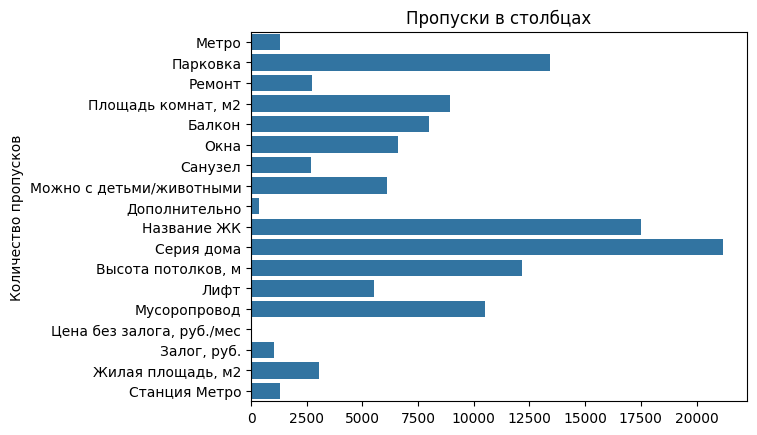

In [18]:
# строим график отображения нулевых значений NaN по столбцам датафрейма
missed_values = df_new.isna().sum()
missed_values = missed_values[missed_values > 0]

if len(missed_values) > 0:
    fig, ax = plt.subplots()
    sns.barplot(x=missed_values.values, y=missed_values.index)
    ax.set_title('Пропуски в столбцах')
    ax.set_ylabel('Количество пропусков')

Окна
Во двор            10870
На улицу и двор     3295
На улицу            2590
Name: count, dtype: int64


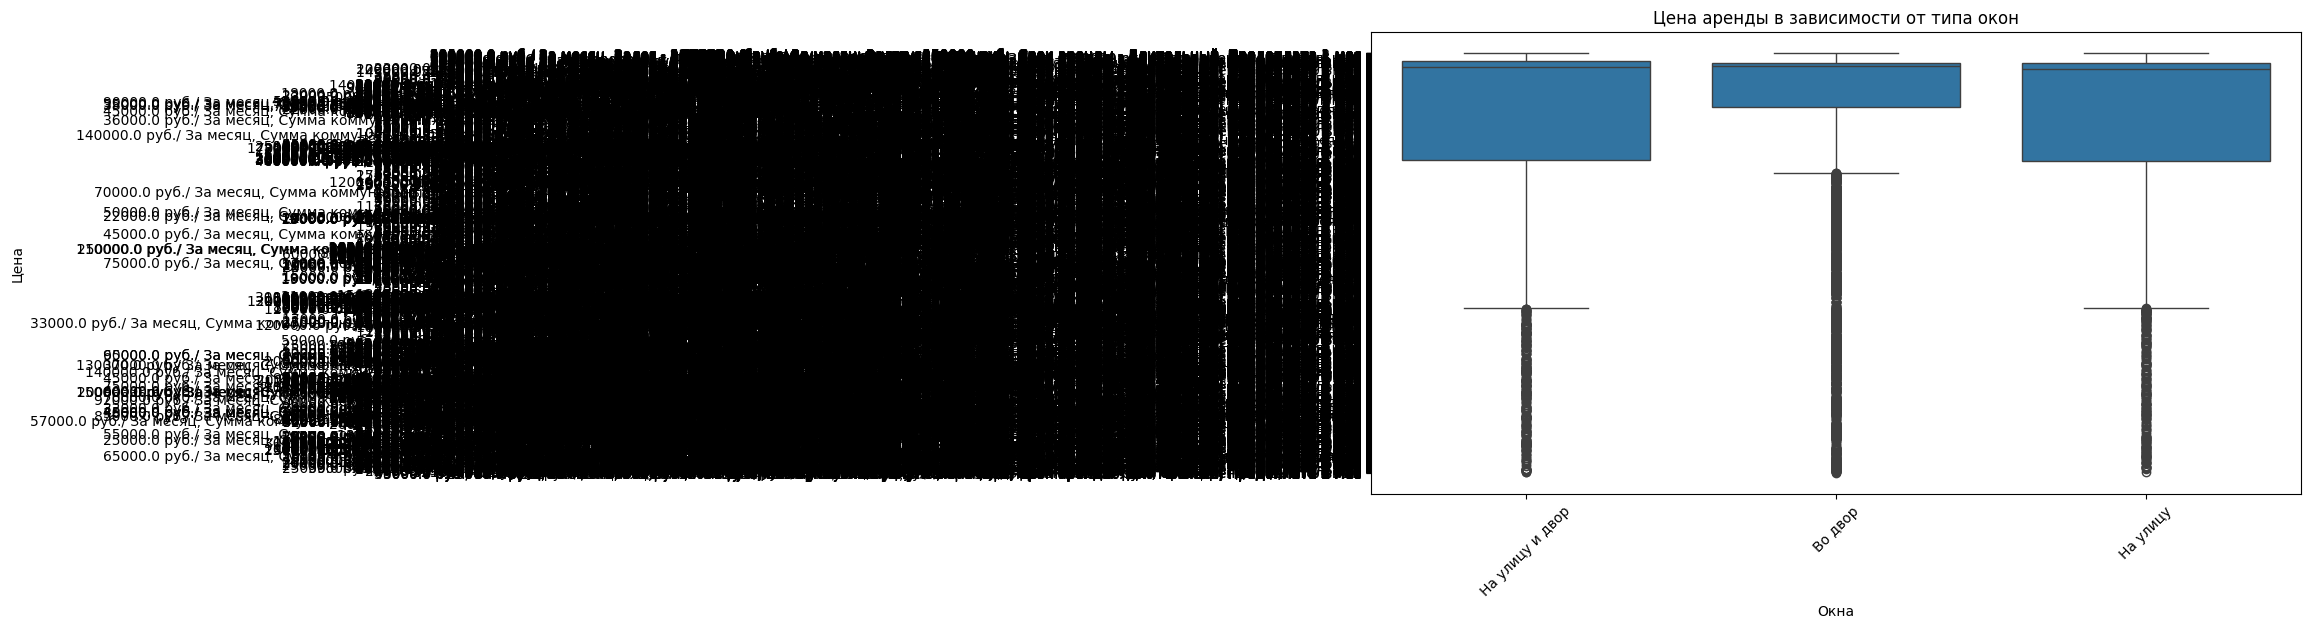

In [19]:


# Сначала посмотрим на уникальные значения в столбце "Окна"
print(df_new['Окна'].value_counts())

# Построим график цены по категориям окон (ящик с усами)
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Окна', y='Цена')
plt.xticks(rotation=45)
plt.title('Цена аренды в зависимости от типа окон')
plt.show()


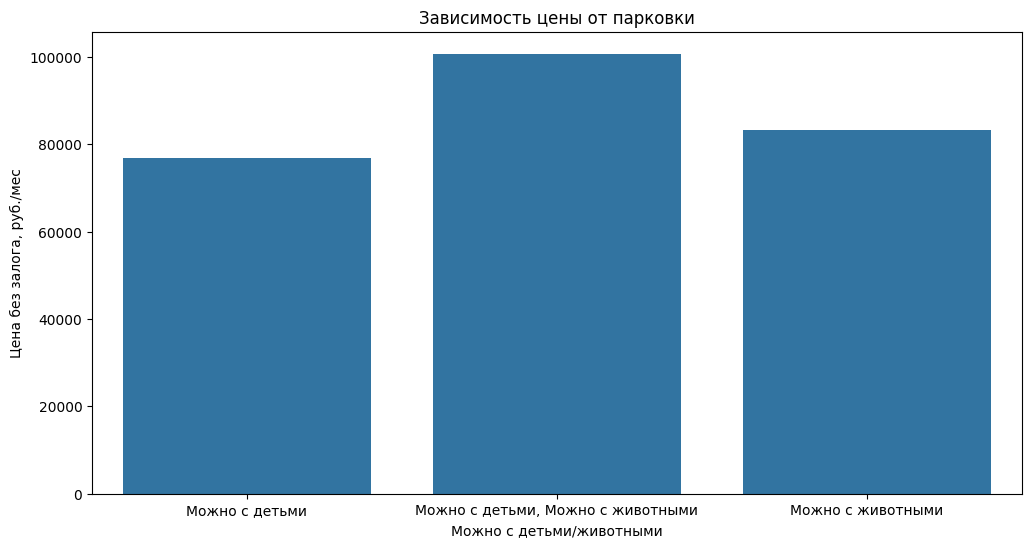

In [20]:
df_new_cleaned_parcking = df_new.dropna(subset=['Можно с детьми/животными'])
df_new_cleaned_parcking = df_new_cleaned_parcking.groupby('Можно с детьми/животными')['Цена без залога, руб./мес'].mean().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=df_new_cleaned_parcking, x = 'Можно с детьми/животными', y = 'Цена без залога, руб./мес')
plt.title('Зависимость цены от парковки')
plt.show()